<h1><strong>-> ANALYSIS OF THE CLIMATE CHANGE ACCORDING TO SOME POLLUTION GASES</strong></h1>

<h2>=== DATASET LINKS ===</h2>

<h5>Pollution Data -> <span><a href='https://www.kaggle.com/sogun3/uspollution'>Link</a></span></h5>
<h5>Climate Data   -> <span><a href='https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities'>Link</a></span></h5>

In [1]:
# LIBRARIES USED

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h3>=== Loading data into DataFrames ===</h3>

In [2]:
pollution_df = pd.read_csv('data/pollution_us_2000_2016.csv')
climate_df = pd.read_csv('data/climate_data.csv')

In [3]:
# VISUALIZING POLLUTION DATA 

pollution_df.head(2)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.0,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.0,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0


In [4]:
# VISUALIZING CLIMATE DATA 

climate_df.head(2)

,State,City,Month,Day,Year,Average_Temperature,Date
0,Arizona,Phoenix,1,1,2000,56.4,2000-01-01
1,Arizona,Phoenix,1,2,2000,49.1,2000-01-02


<h3>=== Checking the Data Types of Columns ===</h3>

In [5]:
# POLLUTION DATA COLUMNS

pollution_df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [6]:
# POLLUTION DATA DTYPES

pollution_df.dtypes

Unnamed: 0             int64
State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

In [7]:
# CLIMATE DATA COLUMNS

climate_df.columns

Index(['State', 'City', 'Month', 'Day', 'Year', 'Average_Temperature', 'Date'], dtype='object')

In [8]:
# POLLUTION DATA DTYPES

climate_df.dtypes

State                   object
City                    object
Month                    int64
Day                      int64
Year                     int64
Average_Temperature    float64
Date                    object
dtype: object

<h3>=== Dropping any null, missing values or unwanted columns ===</h3>

<h5><i># Cleaning POLLUTION DATA</i></h5>

In [9]:
# 1) DROPPING ALL UNWANTED COLUMNS FROM POLLUTION DATA AND RENAMING SOME OF THEM

pollution_df = pollution_df.drop(
    [x for x in pollution_df.columns 
     if x not in ['State', 'City', 'NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'Date Local']
    ], axis=1)

pollution_df.columns = ["State", "City", "Date", "NO2", "O3", "SO2", "CO"]
pollution_df.head()

,State,City,Date,NO2,O3,SO2,CO
0,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833
1,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,0.878947
2,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,1.145833
3,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,0.878947
4,Arizona,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000


In [10]:
# 2) DROPPING ALL CITIES THAT WE DON'T WANT TO WORK WITH

cities_to_work_with = ['Los Angeles', 'New York', 'Dallas', 'Houston', 'Phoenix']
cities_to_drop_indexes = pollution_df[~(pollution_df.City == 'Los Angeles') & 
                       ~(pollution_df.City == 'New York') & 
                       ~(pollution_df.City == 'Dallas') & 
                       ~(pollution_df.City == 'Houston') & 
                       ~(pollution_df.City == 'Phoenix') 
                       ].index

pollution_df.drop(cities_to_drop_indexes, inplace=True)
pollution_df

,State,City,Date,NO2,O3,SO2,CO
0,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833
1,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,0.878947
2,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,1.145833
3,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,0.878947
4,Arizona,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000
...,...,...,...,...,...,...,...
1744946,Texas,Houston,2016-03-30,9.700000,0.014250,-0.187500,0.166667
1744947,Texas,Houston,2016-03-31,11.066667,0.018263,-0.141667,0.214250
1744948,Texas,Houston,2016-03-31,11.066667,0.018263,-0.141667,0.179167
1744949,Texas,Houston,2016-03-31,11.066667,0.018263,-0.112500,0.214250


In [11]:
# 3) CREATING NEW COLUMNS FOR DAY, MONTH AND YEAR TO MATCH WITH CLIMATE DATA

pollution_df['Year'] = pd.DatetimeIndex(pollution_df['Date']).year
pollution_df['Month'] = pd.DatetimeIndex(pollution_df['Date']).month
pollution_df['Day'] = pd.DatetimeIndex(pollution_df['Date']).day
pollution_df

,State,City,Date,NO2,O3,SO2,CO,Year,Month,Day
0,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833,2000,1,1
1,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,0.878947,2000,1,1
2,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,1.145833,2000,1,1
3,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,0.878947,2000,1,1
4,Arizona,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000,2000,1,2
...,...,...,...,...,...,...,...,...,...,...
1744946,Texas,Houston,2016-03-30,9.700000,0.014250,-0.187500,0.166667,2016,3,30
1744947,Texas,Houston,2016-03-31,11.066667,0.018263,-0.141667,0.214250,2016,3,31
1744948,Texas,Houston,2016-03-31,11.066667,0.018263,-0.141667,0.179167,2016,3,31
1744949,Texas,Houston,2016-03-31,11.066667,0.018263,-0.112500,0.214250,2016,3,31


In [12]:
# 4) DROP ANY ROW WITH YEAR GREATER THAN 2015

to_2015_pol = pollution_df['Year'] < 2016
pollution_df = pollution_df[to_2015_pol]
pollution_df

,State,City,Date,NO2,O3,SO2,CO,Year,Month,Day
0,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833,2000,1,1
1,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,0.878947,2000,1,1
2,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,1.145833,2000,1,1
3,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,0.878947,2000,1,1
4,Arizona,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000,2000,1,2
...,...,...,...,...,...,...,...,...,...,...
1712288,Texas,Houston,2015-12-30,6.312500,0.012042,-0.162500,0.270588,2015,12,30
1712289,Texas,Houston,2015-12-31,4.075000,0.020211,-0.004167,0.208000,2015,12,31
1712290,Texas,Houston,2015-12-31,4.075000,0.020211,-0.004167,0.200000,2015,12,31
1712291,Texas,Houston,2015-12-31,4.075000,0.020211,0.000000,0.208000,2015,12,31


<h5><i># Cleaning CLIMATE DATA</i></h5>

In [13]:
# 1) DROP ANY ROW WITH YEAR GREATER THAN 2015 SO IT MATCHES WITH POLLUTION DATA

to_2015_cli = climate_df['Year'] < 2016
climate_df = climate_df[to_2015_cli]
climate_df

,State,City,Month,Day,Year,Average_Temperature,Date
0,Arizona,Phoenix,1,1,2000,56.4,2000-01-01
1,Arizona,Phoenix,1,2,2000,49.1,2000-01-02
2,Arizona,Phoenix,1,3,2000,45.8,2000-01-03
3,Arizona,Phoenix,1,4,2000,51.5,2000-01-04
4,Arizona,Phoenix,1,5,2000,47.9,2000-01-05
...,...,...,...,...,...,...,...
102227,Texas,Dallas,12,26,2015,72.6,2015-12-26
102228,Texas,Dallas,12,27,2015,48.9,2015-12-27
102229,Texas,Dallas,12,28,2015,38.8,2015-12-28
102230,Texas,Dallas,12,29,2015,37.6,2015-12-29


<h3>=== Checking for Outliers ===</h3>

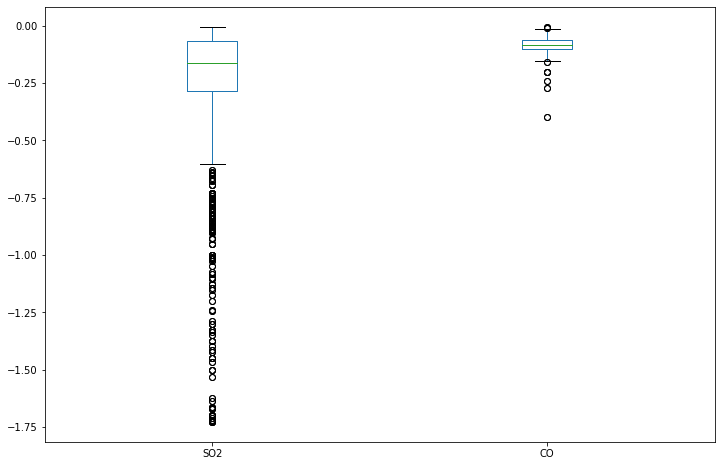

In [14]:
# PLOTTING NEGATIVE VALUES ON POLLUTION DATA
# We found some negative values and we need to get rid of them. We decided to turn them to value 0

gases = ['SO2', 'CO']
pollution_df[gases][pollution_df[gases] < 0].plot.box(figsize=(12,8))

In [15]:
pollution_df['NO2'][pollution_df['NO2'] < 0].value_counts()

-0.152174    4
Name: NO2, dtype: int64

In [16]:
pollution_df['O3'][pollution_df['O3'] < 0].value_counts()

Series([], Name: O3, dtype: int64)

In [17]:
# TURNING NEGATIVE VALUES TO ZERO

for column in ['NO2', 'SO2', 'CO']:
    negatives = pollution_df[(pollution_df[column].lt(0))].index
    pollution_df.loc[negatives, column] = 0

pollution_df

C:\Users\rmart\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,State,City,Date,NO2,O3,SO2,CO,Year,Month,Day
0,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833,2000,1,1
1,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,0.878947,2000,1,1
2,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,1.145833,2000,1,1
3,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,0.878947,2000,1,1
4,Arizona,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000,2000,1,2
...,...,...,...,...,...,...,...,...,...,...
1712288,Texas,Houston,2015-12-30,6.312500,0.012042,0.000000,0.270588,2015,12,30
1712289,Texas,Houston,2015-12-31,4.075000,0.020211,0.000000,0.208000,2015,12,31
1712290,Texas,Houston,2015-12-31,4.075000,0.020211,0.000000,0.200000,2015,12,31
1712291,Texas,Houston,2015-12-31,4.075000,0.020211,0.000000,0.208000,2015,12,31


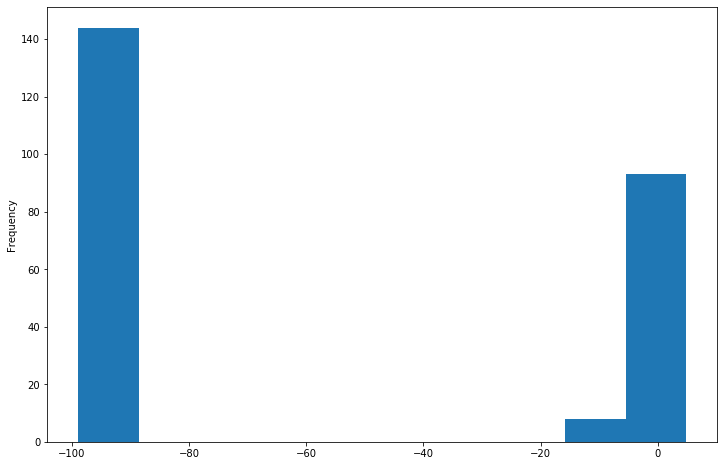

In [18]:
# PLOTTING NEGATIVE VALUES ON CLIMATE DATA
# We found some unreal temperature values and we decided to drop them

climate_df['Average_Temperature'][climate_df['Average_Temperature'] < 5].plot.hist(figsize=(12,8))

In [19]:
# USING MASK TO DROP TEMPERATURES BELLOW -20

less_than_neg20 = climate_df['Average_Temperature'] > -20
climate_data = climate_df[less_than_neg20]
climate_data

,State,City,Month,Day,Year,Average_Temperature,Date
0,Arizona,Phoenix,1,1,2000,56.4,2000-01-01
1,Arizona,Phoenix,1,2,2000,49.1,2000-01-02
2,Arizona,Phoenix,1,3,2000,45.8,2000-01-03
3,Arizona,Phoenix,1,4,2000,51.5,2000-01-04
4,Arizona,Phoenix,1,5,2000,47.9,2000-01-05
...,...,...,...,...,...,...,...
102227,Texas,Dallas,12,26,2015,72.6,2015-12-26
102228,Texas,Dallas,12,27,2015,48.9,2015-12-27
102229,Texas,Dallas,12,28,2015,38.8,2015-12-28
102230,Texas,Dallas,12,29,2015,37.6,2015-12-29


<h3>=== Reducing redundant values in the data ===</h3>

<h5><i># POLLUTION DATA</i></h5>

In [20]:
# FUNCTION USED TO STORE THE AVERAGE VALUE OF GASES PER MONTH/YEAR FOR EACH CITY
# So we can drop all values and create a new DataFrame without days

def get_avg_gases_per_month_year(data, cities, year_range=(2000, 2016), month_range=(1, 13)):
    avg_year_month = {}
    # Cities in data to loop through
    for city in cities:
        avg_year_month[city] = {'NO2': {}, 'O3': {}, 'SO2': {}, 'CO': {}}
        data_copy = data
        data_copy = data[data['City'] == city]
        for year in range(year_range[0], year_range[1]):
            for month in range(month_range[0], month_range[1]):
                key = str(year) + '-' + ('0'+str(month) if len(str(month))== 1 else str(month))
                # Getting the mean
                data_year_month = (data_copy['Year'] == year) & (data_copy['Month'] == month)
                for gas in ['NO2', 'O3', 'SO2', 'CO']:
                    data_mean_values = data_copy[data_year_month][gas].mean()
                    avg_year_month[city][gas][key] = round(data_mean_values, 4)
    
    return avg_year_month


def get_avg_gases_per_year(data, cities, year_range=(2000, 2016)):
    avg_year = {}
    # Cities in data to loop through
    for city in cities:
        avg_year[city] = {'NO2': {}, 'O3': {}, 'SO2': {}, 'CO': {}}
        data_copy = data
        data_copy = data[data['City'] == city]
        for year in range(year_range[0], year_range[1]):
            key = year
            # Getting the mean
            data_year = data_copy['Year'] == year
            for gas in ['NO2', 'O3', 'SO2', 'CO']:
                data_mean_values = data_copy[data_year][gas].mean()
                avg_year[city][gas][key] = round(data_mean_values, 4)
    
    return avg_year

In [21]:
# GETTING ALL MONTH/YEAR GASES AVERAGES PER CITY

gases_per_month_year_by_cities = get_avg_gases_per_year(pollution_df, cities_to_work_with)
gases_per_month_year_by_cities

{'Los Angeles': {'NO2': {2000: 40.1056,
   2001: 37.9475,
   2002: 32.738,
   2003: 33.6259,
   2004: 25.1765,
   2005: 20.0479,
   2006: 21.986,
   2007: 21.4902,
   2008: 20.4043,
   2009: 21.8176,
   2010: 18.641,
   2011: 20.0272,
   2012: 19.8121,
   2013: 18.8667,
   2014: 18.8311,
   2015: 18.1467},
  'O3': {2000: 0.0177,
   2001: 0.0189,
   2002: 0.0217,
   2003: 0.0187,
   2004: 0.0281,
   2005: 0.0234,
   2006: 0.0223,
   2007: 0.0238,
   2008: 0.0238,
   2009: 0.0229,
   2010: 0.0226,
   2011: 0.0223,
   2012: 0.0224,
   2013: 0.0235,
   2014: 0.0261,
   2015: 0.0276},
  'SO2': {2000: 1.2726,
   2001: 2.4532,
   2002: 2.4948,
   2003: 2.0295,
   2004: 2.618,
   2005: 3.7157,
   2006: 1.9429,
   2007: 1.8018,
   2008: 0.9937,
   2009: 1.0298,
   2010: 0.4666,
   2011: 0.2991,
   2012: 0.3935,
   2013: 0.2902,
   2014: 0.2657,
   2015: 0.2762},
  'CO': {2000: 1.0665,
   2001: 1.1439,
   2002: 1.0429,
   2003: 0.959,
   2004: 0.5942,
   2005: 0.4351,
   2006: 0.3837,
   2007: 0

In [22]:
# FUNCTION USED TO CREATE A DATAFRAME OF GIVEN DATA AND CITY

def frame_cities(data, cities):
    data = pd.DataFrame(data[city])
    data = data.reset_index()
    data['City'] = city
    data = data.rename(columns={'index':'Date'})
    return data

In [23]:
# CREATING DATAFRAME FOR EACH CITY WITH THE PREVIOUS FUNCTION

frames_per_city = []

for city in cities_to_work_with:
    frames_per_city.append(frame_cities(gases_per_month_year_by_cities, city))

frames_per_city

[    Date      NO2      O3     SO2      CO         City
 0   2000  40.1056  0.0177  1.2726  1.0665  Los Angeles
 1   2001  37.9475  0.0189  2.4532  1.1439  Los Angeles
 2   2002  32.7380  0.0217  2.4948  1.0429  Los Angeles
 3   2003  33.6259  0.0187  2.0295  0.9590  Los Angeles
 4   2004  25.1765  0.0281  2.6180  0.5942  Los Angeles
 5   2005  20.0479  0.0234  3.7157  0.4351  Los Angeles
 6   2006  21.9860  0.0223  1.9429  0.3837  Los Angeles
 7   2007  21.4902  0.0238  1.8018  0.3841  Los Angeles
 8   2008  20.4043  0.0238  0.9937  0.3770  Los Angeles
 9   2009  21.8176  0.0229  1.0298  0.5203  Los Angeles
 10  2010  18.6410  0.0226  0.4666  0.4491  Los Angeles
 11  2011  20.0272  0.0223  0.2991  0.4169  Los Angeles
 12  2012  19.8121  0.0224  0.3935  0.5572  Los Angeles
 13  2013  18.8667  0.0235  0.2902  0.4844  Los Angeles
 14  2014  18.8311  0.0261  0.2657  0.4996  Los Angeles
 15  2015  18.1467  0.0276  0.2762  0.3892  Los Angeles,
     Date      NO2      O3     SO2      CO     

In [24]:
# CONCATENATING EACH CITY DATAFRAME TO BECOME ONE

pollution_df = frames_per_city[0]

for i in range(1, len(frames_per_city)):
    pollution_df = pd.concat([pollution_df, frames_per_city[i]], ignore_index=True)

pollution_df

,Date,NO2,O3,SO2,CO,City
0,2000,40.1056,0.0177,1.2726,1.0665,Los Angeles
1,2001,37.9475,0.0189,2.4532,1.1439,Los Angeles
2,2002,32.7380,0.0217,2.4948,1.0429,Los Angeles
3,2003,33.6259,0.0187,2.0295,0.9590,Los Angeles
4,2004,25.1765,0.0281,2.6180,0.5942,Los Angeles
...,...,...,...,...,...,...
75,2011,19.8912,0.0251,1.1180,0.4493,Phoenix
76,2012,19.9431,0.0266,1.2513,0.4076,Phoenix
77,2013,18.1303,0.0274,1.0082,0.4076,Phoenix
78,2014,17.9952,0.0267,1.2063,0.4824,Phoenix


In [25]:
# FINALLY, DROPPING NaN VALUES 

pollution_df = pollution_df.dropna()
pollution_df

,Date,NO2,O3,SO2,CO,City
0,2000,40.1056,0.0177,1.2726,1.0665,Los Angeles
1,2001,37.9475,0.0189,2.4532,1.1439,Los Angeles
2,2002,32.7380,0.0217,2.4948,1.0429,Los Angeles
3,2003,33.6259,0.0187,2.0295,0.9590,Los Angeles
4,2004,25.1765,0.0281,2.6180,0.5942,Los Angeles
...,...,...,...,...,...,...
75,2011,19.8912,0.0251,1.1180,0.4493,Phoenix
76,2012,19.9431,0.0266,1.2513,0.4076,Phoenix
77,2013,18.1303,0.0274,1.0082,0.4076,Phoenix
78,2014,17.9952,0.0267,1.2063,0.4824,Phoenix


In [26]:
pollution_df = pollution_df.rename(columns={'Date': 'Year'})
pollution_df

,Year,NO2,O3,SO2,CO,City
0,2000,40.1056,0.0177,1.2726,1.0665,Los Angeles
1,2001,37.9475,0.0189,2.4532,1.1439,Los Angeles
2,2002,32.7380,0.0217,2.4948,1.0429,Los Angeles
3,2003,33.6259,0.0187,2.0295,0.9590,Los Angeles
4,2004,25.1765,0.0281,2.6180,0.5942,Los Angeles
...,...,...,...,...,...,...
75,2011,19.8912,0.0251,1.1180,0.4493,Phoenix
76,2012,19.9431,0.0266,1.2513,0.4076,Phoenix
77,2013,18.1303,0.0274,1.0082,0.4076,Phoenix
78,2014,17.9952,0.0267,1.2063,0.4824,Phoenix


In [27]:
# FUNCTION USED TO TRANSFORM DATE COLUMN INTO TWO COLUMNS (MONTH AND YEAR)

def parsing_date(data, column):    
    for i in ['Month', 'Year']:
        if i == 'Month':
            data[i] = data[column].str.split('-', expand=True)[1]
        else:
            data[i] = data[column].str.split('-', expand=True)[0]
    data = data.drop(column, axis=1)
    return data

<h5><i># CLIMATE DATA</i></h5>

In [28]:
# We found out that New York were written as New York City, so we have transformed it to New York like in pollution data 
climate_df.loc[climate_df['City'] == 'New York City', 'City'] = 'New York'

# Just checking if it has changed to New York
ny_mask = climate_df['City'] == 'New York'
climate_df[ny_mask].head(2)

,State,City,Month,Day,Year,Average_Temperature,Date
29756,New York,New York,1,1,2000,39.7,2000-01-01
29757,New York,New York,1,2,2000,47.9,2000-01-02


In [29]:
# FUNCTION USED TO STORE THE AVERAGE VALUE OF TEMPERATURES PER MONTH/YEAR FOR EACH CITY
# So we can drop all values and create a new DataFrame without days

def get_avg_temp_per_month_year(data, cities, year_range=(2000, 2016), month_range=(1, 13)):
    avg_year_month = {}
    for city in cities:
        avg_year_month[city] = {}
        data_temp = data
        data_temp = data[data['City'] == city]

        for year in range(year_range[0], year_range[1]):
            for month in range(month_range[0], month_range[1]):
                data_mean = (data_temp['Year'] == year) & (data_temp['Month'] == month)
                data_mean_values = data_temp[data_mean]['Average_Temperature'].mean()
                key = str(year) + '-' + ('0'+str(month) if len(str(month))== 1 else str(month))            
                avg_year_month[city][key] = round(data_mean_values, 1)
    return avg_year_month


def get_avg_temp_per_year(data, cities, year_range=(2000, 2016)):
    avg_year = {}
    for city in cities:
        avg_year[city] = {}
        data_temp = data
        data_temp = data[data['City'] == city]

        for year in range(year_range[0], year_range[1]):
            data_mean = data_temp['Year'] == year
            data_mean_values = data_temp[data_mean]['Average_Temperature'].mean()
            key = year            
            avg_year[city][key] = round(data_mean_values, 1)
    return avg_year

In [30]:
# GETTING ALL MONTH/YEAR TEMPERATURES AVERAGES PER CITY

climate_df = get_avg_temp_per_year(climate_df, cities_to_work_with)
climate_df

{'Los Angeles': {2000: 62.4,
  2001: 61.1,
  2002: 59.5,
  2003: 61.7,
  2004: 62.6,
  2005: 62.3,
  2006: 63.0,
  2007: 61.6,
  2008: 62.5,
  2009: 61.7,
  2010: 61.3,
  2011: 61.3,
  2012: 62.7,
  2013: 63.0,
  2014: 65.3,
  2015: 64.9},
 'New York': {2000: 54.4,
  2001: 56.7,
  2002: 54.4,
  2003: 53.2,
  2004: 54.8,
  2005: 55.9,
  2006: 58.2,
  2007: 56.2,
  2008: 55.6,
  2009: 54.1,
  2010: 57.5,
  2011: 56.4,
  2012: 58.1,
  2013: 55.5,
  2014: 54.2,
  2015: 56.4},
 'Dallas': {2000: 67.4,
  2001: 65.6,
  2002: 63.1,
  2003: 65.3,
  2004: 66.3,
  2005: 67.6,
  2006: 69.3,
  2007: 66.8,
  2008: 68.0,
  2009: 65.8,
  2010: 66.8,
  2011: 68.7,
  2012: 69.1,
  2013: 66.0,
  2014: 65.9,
  2015: 67.1},
 'Houston': {2000: 69.3,
  2001: 68.0,
  2002: 67.0,
  2003: 68.7,
  2004: 69.9,
  2005: 69.8,
  2006: 70.6,
  2007: 68.9,
  2008: 68.7,
  2009: 69.5,
  2010: 69.1,
  2011: 71.3,
  2012: 71.5,
  2013: 69.0,
  2014: 68.3,
  2015: 69.7},
 'Phoenix': {2000: 75.0,
  2001: 75.9,
  2002: 74.1,

In [31]:
# CREATING DATAFRAME

climate_df = pd.DataFrame(climate_df)
#parsing_date(climate_df, 'index')
climate_df

,Los Angeles,New York,Dallas,Houston,Phoenix
2000,62.4,54.4,67.4,69.3,75.0
2001,61.1,56.7,65.6,68.0,75.9
2002,59.5,54.4,63.1,67.0,74.1
2003,61.7,53.2,65.3,68.7,75.1
2004,62.6,54.8,66.3,69.9,75.3
2005,62.3,55.9,67.6,69.8,75.5
2006,63.0,58.2,69.3,70.6,75.5
2007,61.6,56.2,66.8,68.9,75.8
2008,62.5,55.6,68.0,68.7,74.8
2009,61.7,54.1,65.8,69.5,75.8


In [32]:
# FINAL DATA SET:

# -> POLLUTION_DF 
# -> CLIMATE_DF

# We decided to created a dataset for each gas using the same format as the climate data
# In that case we have 4 different datasets for the gases using cities as columns and year as indexes

<h3>=== Reorganizing Datasets ===</h3>

In [33]:
# FUNCTION USED TO GET THE DATA FOR EACH GAS IN THE SAME FORMAT AS CLIMATE DATA

def get_data_for_each_gas(data, gas, city_list):
    no2_per_year_lst = []
    for city in cities_to_work_with:
        no2_per_year = data[[gas, 'City', 'Year']].groupby(['Year', 'City']).mean()
        no2_per_year = no2_per_year.iloc[no2_per_year.index.get_level_values('City') == city]
        no2_per_year = no2_per_year.reset_index()
        no2_per_year = no2_per_year.set_index('Year')
        no2_per_year = no2_per_year.drop(columns=('City'), axis=1)
        no2_per_year = no2_per_year.rename(columns={gas: city})
        no2_per_year_lst.append(no2_per_year)

    df = no2_per_year_lst[0]
    for i in range(1, len(no2_per_year_lst)):
        df = df.append(no2_per_year_lst[i])

    dataf = df[cities_to_work_with[0]].dropna().to_frame()
    for i in range(1, len(cities_to_work_with)):
        t = df[cities_to_work_with[i]].dropna().to_frame()
        dataf = dataf.join(t, how='inner')
    dataf.index.name = None
    return dataf

In [34]:
# NO2 DATA

no2_df = get_data_for_each_gas(pollution_df, 'NO2', cities_to_work_with)
no2_df

,Los Angeles,New York,Dallas,Houston,Phoenix
2000,40.1056,26.7193,18.4965,16.8673,29.1213
2001,37.9475,28.5194,18.8545,16.8720,28.8365
2003,33.6259,26.7363,18.2647,14.0919,29.3263
2004,25.1765,24.5736,16.3591,12.3014,24.5730
2005,20.0479,25.7116,16.9063,11.8734,23.9535
2006,21.9860,24.2292,15.2825,13.3080,22.4053
2007,21.4902,23.2719,15.7134,15.8273,22.3958
2008,20.4043,23.1042,12.5358,14.1894,20.8949
2009,21.8176,21.6850,12.4601,9.5116,19.6189
2010,18.6410,19.7114,13.1061,13.1516,18.2995


In [35]:
# O3 DATA

o3_df = get_data_for_each_gas(pollution_df, 'O3', cities_to_work_with)
o3_df

,Los Angeles,New York,Dallas,Houston,Phoenix
2000,0.0177,0.0178,0.0244,0.0195,0.0217
2001,0.0189,0.0180,0.0224,0.0199,0.0200
2003,0.0187,0.0174,0.0262,0.0207,0.0207
2004,0.0281,0.0172,0.0224,0.0195,0.0220
2005,0.0234,0.0192,0.0263,0.0199,0.0242
2006,0.0223,0.0194,0.0283,0.0193,0.0257
2007,0.0238,0.0194,0.0217,0.0198,0.0236
2008,0.0238,0.0198,0.0226,0.0214,0.0254
2009,0.0229,0.0194,0.0195,0.0213,0.0250
2010,0.0226,0.0233,0.0249,0.0233,0.0257


In [36]:
# SO2 DATA

so2_df = get_data_for_each_gas(pollution_df, 'SO2', cities_to_work_with)
so2_df

,Los Angeles,New York,Dallas,Houston,Phoenix
2000,1.2726,7.4800,0.9480,6.1064,2.3374
2001,2.4532,8.5596,0.9933,4.3666,2.4740
2003,2.0295,8.0057,0.9720,6.1354,2.5718
2004,2.6180,7.0953,0.8393,6.5006,2.2661
2005,3.7157,7.4059,0.8268,7.1317,2.3866
2006,1.9429,5.9353,0.7161,4.0164,2.0039
2007,1.8018,5.5669,0.3130,2.8704,1.8212
2008,0.9937,5.2149,0.5267,1.4906,1.9256
2009,1.0298,4.5121,0.5350,1.4048,1.6244
2010,0.4666,3.8569,0.6416,1.5511,1.3855


In [37]:
# CO DATA

co_df = get_data_for_each_gas(pollution_df, 'CO', cities_to_work_with)
co_df

,Los Angeles,New York,Dallas,Houston,Phoenix
2000,1.0665,0.6205,0.3927,0.3822,1.0097
2001,1.1439,0.6155,0.3851,0.3023,0.8580
2003,0.9590,0.6976,0.4231,0.6743,0.7849
2004,0.5942,0.5793,0.4045,0.3037,0.5619
2005,0.4351,0.5534,0.4108,0.1347,0.7127
2006,0.3837,0.4766,0.3405,0.1887,0.6441
2007,0.3841,0.5068,0.3711,0.2052,0.6205
2008,0.3770,0.4954,0.2981,0.2211,0.5282
2009,0.5203,0.4004,0.2840,0.1840,0.5155
2010,0.4491,0.4488,0.2642,0.2334,0.4334


<h3>=== Using Scatter Plot to show relationship between variables ===</h3>

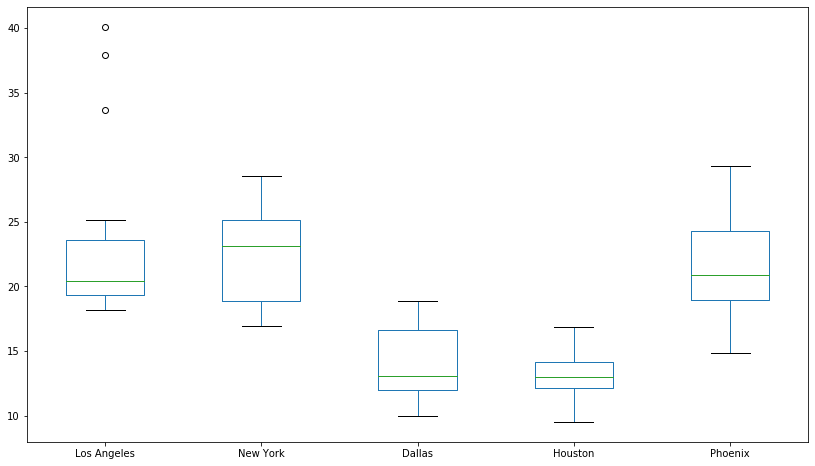

In [38]:
no2_df.plot(kind='box', figsize=(14,8))

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Average CO per Year')

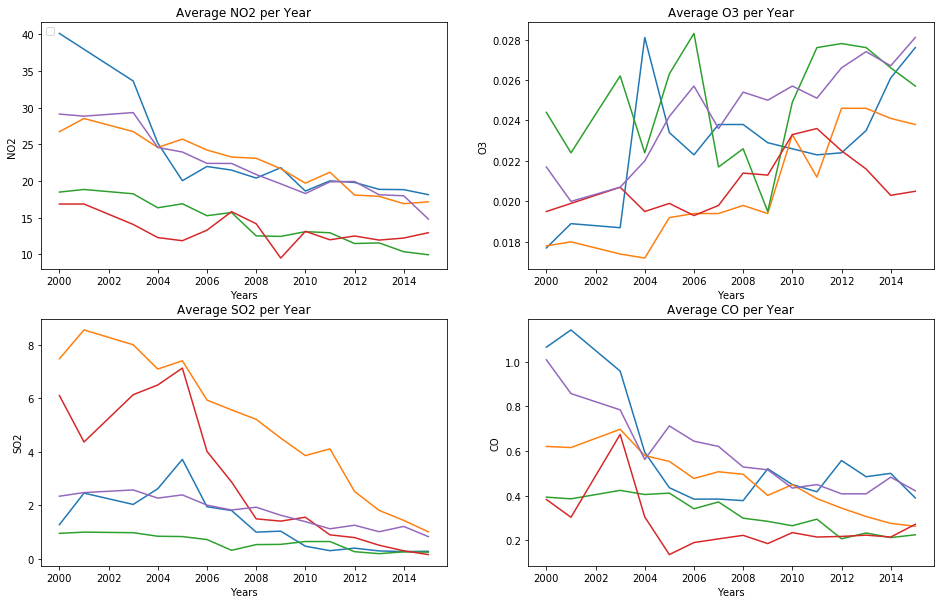

In [39]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

axes[0, 0].plot(no2_df)
axes[0, 0].set_xlabel('Years')
axes[0, 0].set_ylabel('NO2')
axes[0, 0].set_title('Average NO2 per Year')
axes[0, 0].legend(loc='upper left', frameon=True)

axes[0, 1].plot(o3_df)
axes[0, 1].set_xlabel('Years')
axes[0, 1].set_ylabel('O3')
axes[0, 1].set_title('Average O3 per Year')
                      
axes[1, 0].plot(so2_df)
axes[1, 0].set_xlabel('Years')
axes[1, 0].set_ylabel('SO2')
axes[1, 0].set_title('Average SO2 per Year')
                      
axes[1, 1].plot(co_df)
axes[1, 1].set_xlabel('Years')
axes[1, 1].set_ylabel('CO')
axes[1, 1].set_title('Average CO per Year')

Text(0, 0.5, 'CO')

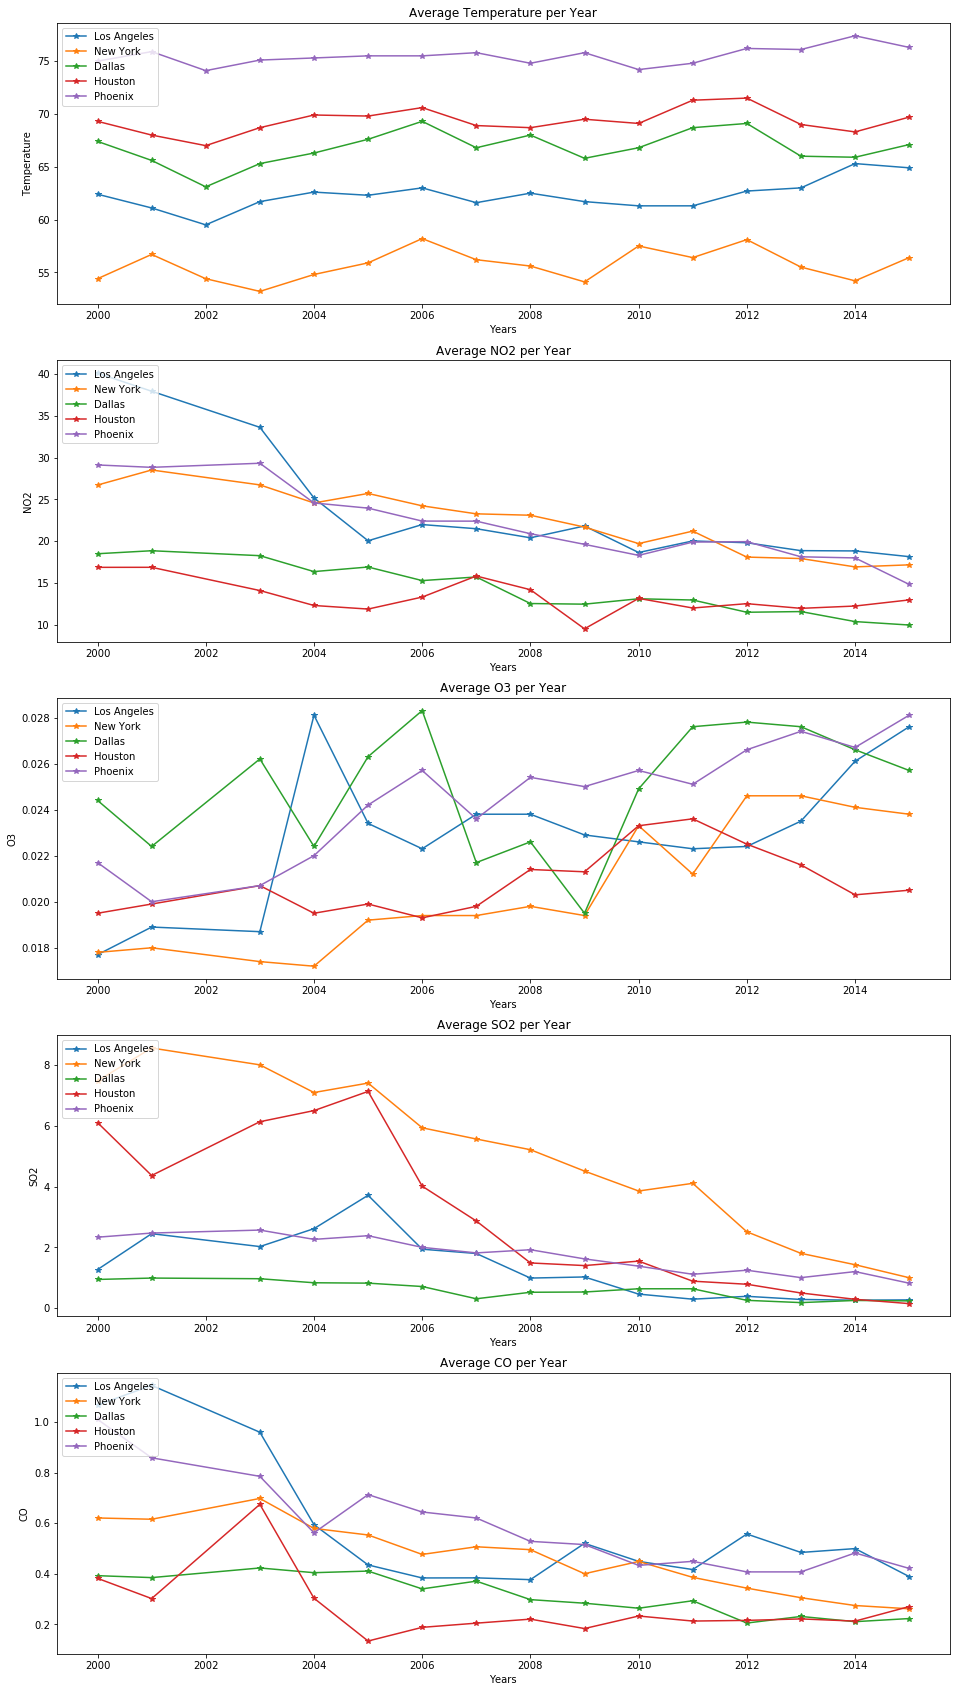

In [50]:
fig, ax = plt.subplots(5, figsize=(16,30))
for city in cities_to_work_with:
    temp = climate_df.loc[::][city]
    temp1 = no2_df.loc[::][city]
    temp2 = o3_df.loc[::][city]
    temp3 = so2_df.loc[::][city]
    temp4 = co_df.loc[::][city]
    ax[0].plot(temp, '-*', label=city)
    ax[1].plot(temp1, '-*', label=city)
    ax[2].plot(temp2, '-*', label=city)
    ax[3].plot(temp3, '-*', label=city)
    ax[4].plot(temp4, '-*', label=city)
ax[0].legend(loc='upper left', frameon=True)
ax[0].set_title('Average Temperature per Year')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Temperature')
ax[1].legend(loc='upper left', frameon=True)
ax[1].set_title('Average NO2 per Year')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('NO2')
ax[2].legend(loc='upper left', frameon=True)
ax[2].set_title('Average O3 per Year')
ax[2].set_xlabel('Years')
ax[2].set_ylabel('O3')
ax[3].legend(loc='upper left', frameon=True)
ax[3].set_title('Average SO2 per Year')
ax[3].set_xlabel('Years')
ax[3].set_ylabel('SO2')
ax[4].legend(loc='upper left', frameon=True)
ax[4].set_title('Average CO per Year')
ax[4].set_xlabel('Years')
ax[4].set_ylabel('CO')

<h2>=== Box Plot, Scatter Plot, Pair Plot, Z-score, Histogram, Heatmaps ===</h2>

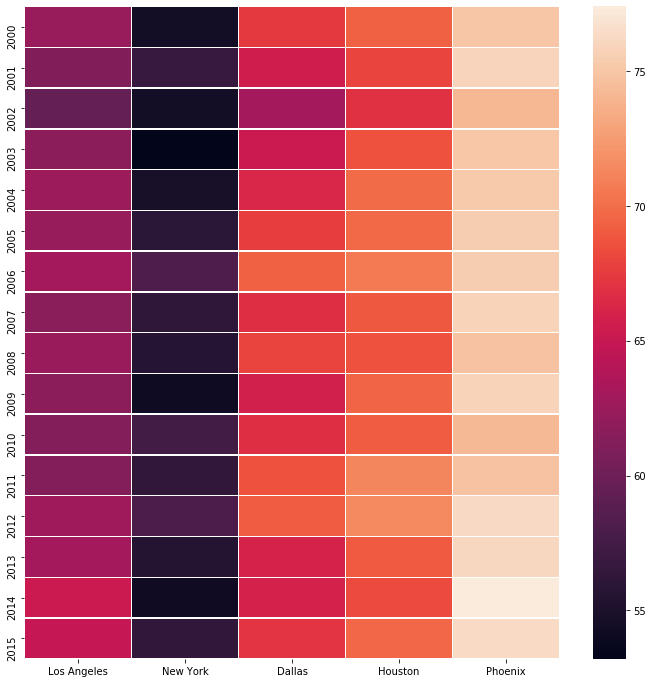

In [67]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(climate_df, linewidths=.5)

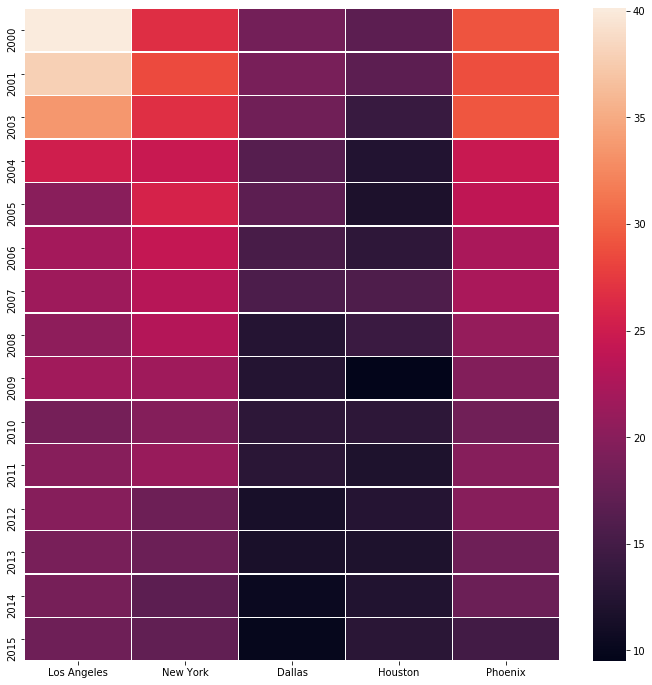

In [61]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(no2_df, linewidths=.5)

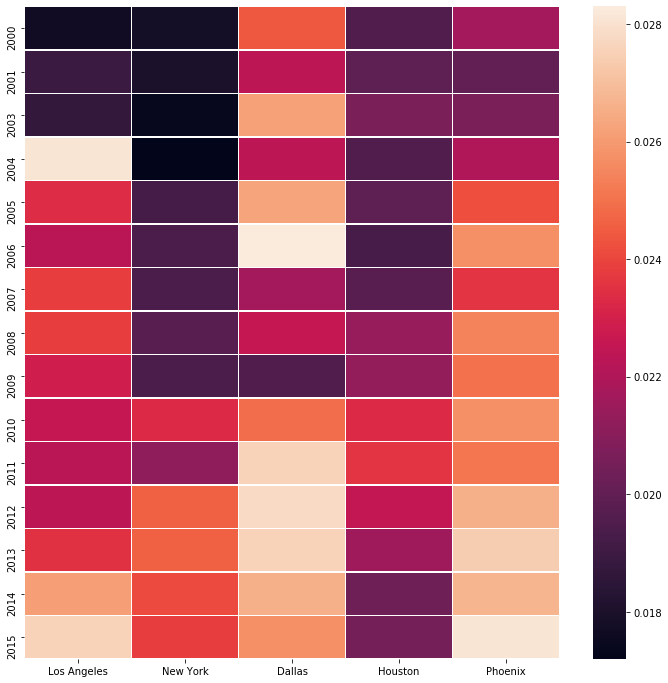

In [62]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(o3_df, linewidths=.5)

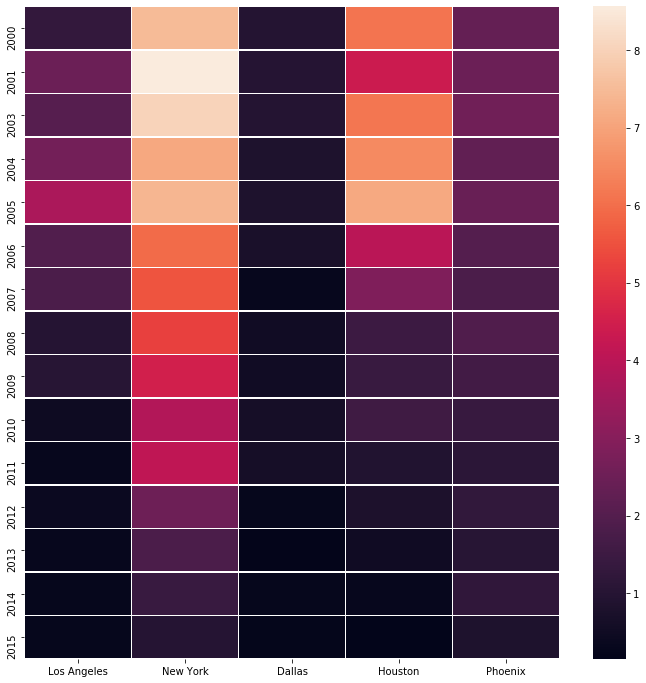

In [63]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(so2_df, linewidths=.5)

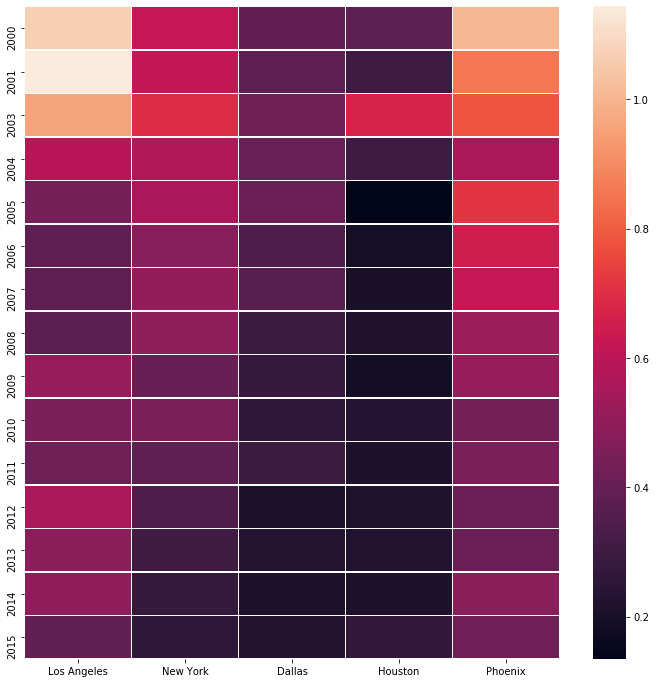

In [64]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(co_df, linewidths=.5)

<h2>Box Plot, Scatter Plot, Pair Plot, Z-score, Histogram, Heatmaps</h2>

In [ ]:
cities_data_test.boxplot(column=['NO2', 'O3', 'SO2', 'CO'], figsize=(14,8))

In [ ]:
temp_data.boxplot(column=['Los Angeles', 'New York', 'Phoenix', 'Dallas', 'Houston', 'Boston'], figsize=(14,8))

In [ ]:
from scipy.stats import zscore

df = temp_data[['Los Angeles', 'New York']]
df.apply(zscore)

In [ ]:
cities_data_test.hist(column=['NO2', 'O3', 'SO2', 'CO'], figsize=(14,8))

In [ ]:
def mean_temp_per_city(data, year_range, city):
    mean = []
    for year in range(year_range[0], year_range[1]):
        temp = data['Year'] == str(year)
        temp = data[temp]
        mean.append(round(temp[city].mean(), 1))
    return mean

In [ ]:
def mean_gas_per_city(data, year_range, city, gas):
    mean = []
    for year in range(year_range[0], year_range[1]):
        temp = (data['Year'] == str(year)) & (data['City'] == city) 
        temp = data[temp]
        mean.append(round(temp[gas].mean(), 1))
    return mean

In [ ]:
year_range = 2000, 2016

In [ ]:
ny_data = mean_temp_per_city(temp_data, year_range, 'New York')
ny_co_data = mean_gas_per_city(cities_data_test, year_range, 'New York', 'CO')
ny_so2_data = mean_gas_per_city(cities_data_test, year_range, 'New York', 'SO2')
ny_o3_data = mean_gas_per_city(cities_data_test, year_range, 'New York', 'O3')
ny_no2_data = mean_gas_per_city(cities_data_test, year_range, 'New York', 'NO2')
ny = pd.DataFrame(data={'CO': ny_co_data, 'SO2': ny_so2_data, 'O3': ny_o3_data, 'NO2': ny_no2_data, 'Temperature': ny_data, 'Year': range(2000, 2016)})
ny.plot.line(x='Year', y=['CO', 'SO2', 'O3', 'NO2'], figsize=(15,10))

In [ ]:
ny.plot(x='Year', y='Temperature', figsize=(15,10))

In [ ]:
la_data = mean_temp_per_city(temp_data, year_range, 'Los Angeles')
la_co_data = mean_gas_per_city(cities_data_test, year_range, 'Los Angeles', 'CO')
la_so2_data = mean_gas_per_city(cities_data_test, year_range, 'Los Angeles', 'SO2')
la_o3_data = mean_gas_per_city(cities_data_test, year_range, 'Los Angeles', 'O3')
la_no2_data = mean_gas_per_city(cities_data_test, year_range, 'Los Angeles', 'NO2')
la = pd.DataFrame(data={'CO': la_co_data, 'SO2': la_so2_data, 'O3': la_o3_data, 'NO2': la_no2_data, 'Temperature': la_data, 'Year': range(2000, 2016)})
la.plot(x='Year', y=['CO', 'SO2', 'O3', 'NO2'], figsize=(15,10))

In [ ]:
la.plot(x='Year', y='Temperature', figsize=(15,10))

In [ ]:
dallas_data = mean_temp_per_city(temp_data, year_range, 'Dallas')
dallas_co_data = mean_gas_per_city(cities_data_test, year_range, 'Dallas', 'CO')
dallas_so2_data = mean_gas_per_city(cities_data_test, year_range, 'Dallas', 'SO2')
dallas_o3_data = mean_gas_per_city(cities_data_test, year_range, 'Dallas', 'O3')
dallas_no2_data = mean_gas_per_city(cities_data_test, year_range, 'Dallas', 'NO2')
dallas = pd.DataFrame(data={'CO': dallas_co_data, 'SO2': dallas_so2_data, 'O3': dallas_o3_data, 'NO2': dallas_no2_data, 'Temperature': dallas_data, 'Year': range(2000, 2016)})
dallas.plot.line(x='Year', y=['CO', 'SO2', 'O3', 'NO2'], figsize=(15,10))

In [ ]:
dallas.plot(x='Year', y='Temperature', figsize=(15,10))

In [ ]:
year_range = 2004, 2016
houston_data = mean_temp_per_city(temp_data, year_range, 'Houston')
houston_co_data = mean_gas_per_city(cities_data_test, year_range, 'Houston', 'CO')
houston_so2_data = mean_gas_per_city(cities_data_test, year_range, 'Houston', 'SO2')
houston_o3_data = mean_gas_per_city(cities_data_test, year_range, 'Houston', 'O3')
houston_no2_data = mean_gas_per_city(cities_data_test, year_range, 'Houston', 'NO2')
houston = pd.DataFrame(data={'CO': houston_co_data, 'SO2': houston_so2_data, 'O3': houston_o3_data, 'NO2': houston_no2_data, 'Temperature': houston_data, 'Year': range(2004, 2016)})
houston.plot.line(x='Year', y=['CO', 'SO2', 'O3', 'NO2'], figsize=(15,10))

In [ ]:
houston.plot(x='Year', y='Temperature', figsize=(15,10))

<img src='images/image3.png'>